In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

import mglearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


### 데이터 분리

In [120]:
df = pd.read_csv('../../data/team/수질데이터최종_R_1.csv',encoding = 'ANSI')

In [122]:
mini = df.loc[:,'표층수온':].min()
maxi = df.loc[:,'표층수온':].max()
df.loc[:,'표층수온':] = (df.loc[:,'표층수온':] - mini)/(maxi-mini)

In [124]:
x = df.iloc[:,5:53]
y = df.iloc[:,4]
Y = pd.get_dummies(y).values

In [130]:
# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(x, Y , test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((5142, 42), (2204, 42), (5142, 5), (2204, 5))


### 모델링


In [131]:
# 모델생성

model = Sequential()
model.add(Dense(200,input_shape=(42,), activation = 'relu'))
model.add(Dense(100, activation = 'relu'))


model.add(Dense(5 , activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 200)               8600      
_________________________________________________________________
dense_30 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 505       
Total params: 29,205
Trainable params: 29,205
Non-trainable params: 0
_________________________________________________________________


In [132]:
hist= model.fit(x_train, y_train, epochs=250)

Epoch 1/250
5142/5142 [==============================] - 0s 78us/step - loss: 1.2027 - accuracy: 0.4617
Epoch 2/250
5142/5142 [==============================] - 0s 34us/step - loss: 1.0159 - accuracy: 0.5377
Epoch 3/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.9461 - accuracy: 0.5745
Epoch 4/250
5142/5142 [==============================] - 0s 38us/step - loss: 0.8882 - accuracy: 0.6099
Epoch 5/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.8480 - accuracy: 0.6332
Epoch 6/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.8170 - accuracy: 0.6445
Epoch 7/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.7856 - accuracy: 0.6637
Epoch 8/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.7567 - accuracy: 0.6750
Epoch 9/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.7360 - accuracy: 0.6842
Epoch 10/250
5142/5142 [==============================] - 0s 35u

5142/5142 [==============================] - 0s 36us/step - loss: 0.3190 - accuracy: 0.8757
Epoch 79/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.3231 - accuracy: 0.8703
Epoch 80/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.3146 - accuracy: 0.8718
Epoch 81/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.3320 - accuracy: 0.8666
Epoch 82/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.3191 - accuracy: 0.8724
Epoch 83/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.3007 - accuracy: 0.8820
Epoch 84/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.3058 - accuracy: 0.8794
Epoch 85/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.3006 - accuracy: 0.8767
Epoch 86/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.3045 - accuracy: 0.8746
Epoch 87/250
5142/5142 [==============================] - 0s 35us/st

5142/5142 [==============================] - 0s 35us/step - loss: 0.1773 - accuracy: 0.9329
Epoch 156/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1720 - accuracy: 0.9333
Epoch 157/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1792 - accuracy: 0.9282
Epoch 158/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1712 - accuracy: 0.9370
Epoch 159/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.1675 - accuracy: 0.9333
Epoch 160/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1800 - accuracy: 0.9327
Epoch 161/250
5142/5142 [==============================] - 0s 36us/step - loss: 0.1852 - accuracy: 0.9302
Epoch 162/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1798 - accuracy: 0.9313
Epoch 163/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1818 - accuracy: 0.9325
Epoch 164/250
5142/5142 [==============================] - 0

5142/5142 [==============================] - 0s 34us/step - loss: 0.1069 - accuracy: 0.9597
Epoch 232/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.1158 - accuracy: 0.9524
Epoch 233/250
5142/5142 [==============================] - 0s 35us/step - loss: 0.1315 - accuracy: 0.9471
Epoch 234/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.1327 - accuracy: 0.9551
Epoch 235/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.0914 - accuracy: 0.9730
Epoch 236/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.1128 - accuracy: 0.9592
Epoch 237/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.0927 - accuracy: 0.9689
Epoch 238/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.1018 - accuracy: 0.9627
Epoch 239/250
5142/5142 [==============================] - 0s 34us/step - loss: 0.1025 - accuracy: 0.9642
Epoch 240/250
5142/5142 [==============================] - 0

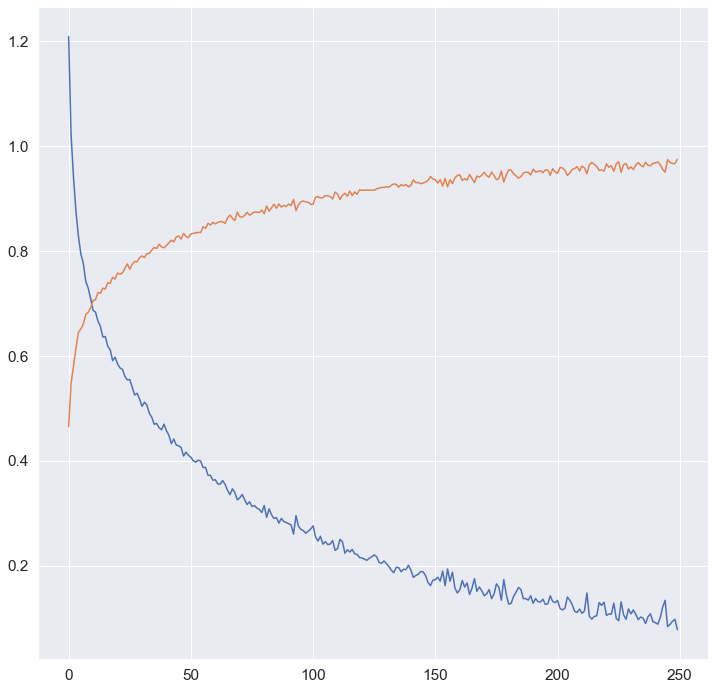

In [128]:
# 시각화
plt.figure(figsize = (12,12))
plt.plot(hist.history['loss'])

plt.plot(hist.history['accuracy'])


In [134]:
# 모델평가
loss, accuracy = model.evaluate(x_test, y_test)
print('정확도 = {:.2f}'.format(accuracy))
print('손실 = {:.2f}'.format(loss))

2204/2204 [==============================] - 0s 22us/step
정확도 = 0.81
손실 = 0.88


2204/2204 [==============================] - 0s 18us/step


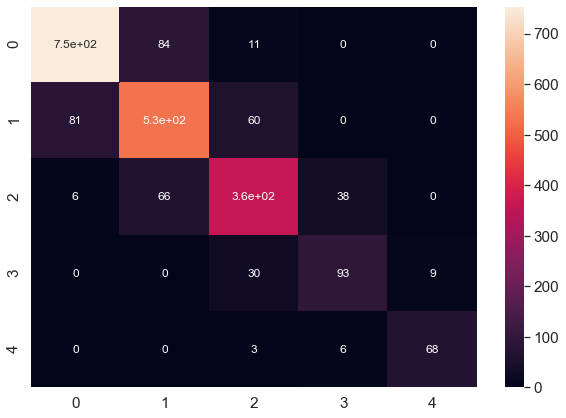

In [116]:
Y_pred = model.predict(x_test, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={'size':12})
plt.show()

# 수질지수에 사용되는 요인이 포함된 데이터로 돌렸는데 75 % 정도 정확도가 나옴
# 히트맵으로 볼 시 오차도 자신보다 1,2단계 낮은 수질로 일부 나오나 극단적으로 못맞추는
# 경우는 없음

In [135]:
model.save('수질모델_82.h5')

In [138]:
df['연안명칭'].unique()

array(['거진연안', '속초연안', '양양연안', '주문진연안', '강릉연안', '동해연안', '삼척연안', '죽변연안',
       '후포연안', '축산연안', '강구연안', '월포연안', '영 일 만', '구룡포연안', '감포연안', '울산연안',
       '온산연안', '기장연안', '부산연안', '낙동강하구', '신항연안', '행 암 만', '마 산 만', '진 해 만',
       '거제도동안', '거제도남안', '통영연안', '통영외안', '고성.자란만', '사천연안', '진 주 만',
       '남해도남안', '광 양 만', '여수연안', '가 막 만', '여 자 만', '고흥연안', '득 량 만',
       '제주연안', '조천연안', '성산연안', '표선연안', '서귀포연안', '대정연안', '한림연안', '완도연안',
       '도 암 만', '진도연안', '해 남 만', '목포연안', '신안연안', '무안연안', '함평연안', '고창연안',
       '전주포연안', '군산연안', '보령연안', '천 수 만', '태안연안', '가로림연안', '대산연안', '아산연안',
       '인천연안', '시화호', '섬진강', '왕피천하구', '삼척오십천하구', '강릉남대천하구', '양양남대천하구'],
      dtype=object)